<a href="https://colab.research.google.com/github/gulabpatel/NLP_Basics/blob/main/Part%200.3%3A%20N_gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N-gram and its Applications**

In [1]:
import pandas as pd

# Dataset will be stored in a Pandas Dataframe
url= 'https://raw.githubusercontent.com/DataScience-in-Tourism/Chapter-15-Introduction-Natural-Language-Processing/main/tourism_tweets_cleaned.csv'
df = pd.read_csv(url)

# Check first five columns of the dataset
df.head(5)

,Unnamed: 0,id1,url,url2,date,username,quote,tweet,as1,as2,...,lang,coords,Unnamed: 18,punctuation,hastags,stopwords,lng,lng_score,char_count,avg_word
0,0,1,https://twitter.com/_LoveCaribbean/statuses/12...,https://twitter.com/_LoveCaribbean/statuses/12...,2020-04-22 07:47:13,_LoveCaribbean,RT @grenadaexplorer: A tropical treasure to ch...,tropical treasure cherish forever exclusive t...,Twitter Web App,1356684936,...,NaN,NaN,NaN,21,0,4,en,0.999996,232,10.6
1,1,2,https://twitter.com/carolcruising/statuses/125...,https://twitter.com/carolcruising/statuses/125...,2020-04-22 07:44:47,carolcruising,RT @clairesturz: Backpacking in #Cuba on a Bud...,backpack cuba budget travelsomeday armchair...,Twitter Web App,319114596,...,NaN,NaN,NaN,9,0,3,en,0.999996,67,9.5
2,3,4,https://twitter.com/clairesturz/statuses/12529...,https://twitter.com/clairesturz/statuses/12529...,2020-04-22 07:32:39,clairesturz,Experience Buenos Aires like a local #travelso...,experience burns air like local travelsomeday...,Revive Social App,874023301,...,NaN,NaN,NaN,9,0,1,en,0.999997,88,8.3
3,4,5,https://twitter.com/grenadaexplorer/statuses/1...,https://twitter.com/grenadaexplorer/statuses/1...,2020-04-22 07:32:02,grenadaexplorer,Who can\'t wait for Grenada Sailing Festival 2...,cant wait grenade sail festival 2021 exclusi...,Buffer,17083471,...,NaN,NaN,NaN,25,0,3,en,0.996475,227,10.3
4,5,6,https://twitter.com/ikefuller/statuses/1252922...,https://twitter.com/ikefuller/statuses/1252922...,2020-04-22 07:30:12,ikefuller,RT @clairesturz: The Best Hostel in Barcelona ...,best hostel barcelona fabrizzio s petit revi...,Twitter Web App,283127000,...,NaN,NaN,NaN,8,0,2,en,0.857140,94,7.9


In [2]:
#Let's only use tweet column as data
# Redefine df
df= df.tweet

In [3]:
# Check first six reviews
df.head()

0    tropical treasure cherish forever exclusive  t...
1    backpack  cuba budget  travelsomeday  armchair...
2    experience burns air like local  travelsomeday...
3    cant wait grenade sail festival 2021   exclusi...
4    best hostel barcelona  fabrizzio  s petit revi...
Name: tweet, dtype: object

In [4]:
# Make sure the reviews are in string format.
df = str(df)

# Check the type of the reviews. If it's str, we are in the correct path
type(df)

str

Basic data cleaning

In [5]:
# Make a small data cleaning just in case we have uncleaned data
# Get rid of chararacters that can't be read
import re
df = re.sub(r'[^a-zA-Z0-9\s]', ' ', df)
pattern = r'[0-9]'

# Match all digits in the string and replace them by empty string
df  = re.sub(pattern, '', df)

In [6]:
# In the dataset, we make have '\r' and '\n' strings
# Let's remove them by replacing with an empty string
df = df.replace('\r', '').replace('\n', '')

Tokenization

In [7]:
# Import required libraries for n-gram
import nltk
from nltk.util import ngrams
import re

# Tokenize the reviews in the dataset
tokens = [token for token in df.split(" ") if token != "" ]

#Let's check tokens for the first column
tokens[:20]

['tropical',
 'treasure',
 'cherish',
 'forever',
 'exclusive',
 't',
 'backpack',
 'cuba',
 'budget',
 'travelsomeday',
 'armchair',
 'experience',
 'burns',
 'air',
 'like',
 'local',
 'travelsomeday',
 'cant',
 'wait',
 'grenade']

In [8]:
list(ngrams(tokens, 5))

[('tropical', 'treasure', 'cherish', 'forever', 'exclusive'),
 ('treasure', 'cherish', 'forever', 'exclusive', 't'),
 ('cherish', 'forever', 'exclusive', 't', 'backpack'),
 ('forever', 'exclusive', 't', 'backpack', 'cuba'),
 ('exclusive', 't', 'backpack', 'cuba', 'budget'),
 ('t', 'backpack', 'cuba', 'budget', 'travelsomeday'),
 ('backpack', 'cuba', 'budget', 'travelsomeday', 'armchair'),
 ('cuba', 'budget', 'travelsomeday', 'armchair', 'experience'),
 ('budget', 'travelsomeday', 'armchair', 'experience', 'burns'),
 ('travelsomeday', 'armchair', 'experience', 'burns', 'air'),
 ('armchair', 'experience', 'burns', 'air', 'like'),
 ('experience', 'burns', 'air', 'like', 'local'),
 ('burns', 'air', 'like', 'local', 'travelsomeday'),
 ('air', 'like', 'local', 'travelsomeday', 'cant'),
 ('like', 'local', 'travelsomeday', 'cant', 'wait'),
 ('local', 'travelsomeday', 'cant', 'wait', 'grenade'),
 ('travelsomeday', 'cant', 'wait', 'grenade', 'sail'),
 ('cant', 'wait', 'grenade', 'sail', 'festiva

###  **Creating n-gram models with different numbers of n**

In [9]:
# Ngram with n=3
list(ngrams(tokens, 3))

[('tropical', 'treasure', 'cherish'),
 ('treasure', 'cherish', 'forever'),
 ('cherish', 'forever', 'exclusive'),
 ('forever', 'exclusive', 't'),
 ('exclusive', 't', 'backpack'),
 ('t', 'backpack', 'cuba'),
 ('backpack', 'cuba', 'budget'),
 ('cuba', 'budget', 'travelsomeday'),
 ('budget', 'travelsomeday', 'armchair'),
 ('travelsomeday', 'armchair', 'experience'),
 ('armchair', 'experience', 'burns'),
 ('experience', 'burns', 'air'),
 ('burns', 'air', 'like'),
 ('air', 'like', 'local'),
 ('like', 'local', 'travelsomeday'),
 ('local', 'travelsomeday', 'cant'),
 ('travelsomeday', 'cant', 'wait'),
 ('cant', 'wait', 'grenade'),
 ('wait', 'grenade', 'sail'),
 ('grenade', 'sail', 'festival'),
 ('sail', 'festival', 'exclusi'),
 ('festival', 'exclusi', 'best'),
 ('exclusi', 'best', 'hostel'),
 ('best', 'hostel', 'barcelona'),
 ('hostel', 'barcelona', 'fabrizzio'),
 ('barcelona', 'fabrizzio', 's'),
 ('fabrizzio', 's', 'petit'),
 ('s', 'petit', 'revi'),
 ('petit', 'revi', 'lip'),
 ('revi', 'lip', 

In [10]:
# Ngram with n=4
list(ngrams(tokens, 4))[:4]

[('tropical', 'treasure', 'cherish', 'forever'),
 ('treasure', 'cherish', 'forever', 'exclusive'),
 ('cherish', 'forever', 'exclusive', 't'),
 ('forever', 'exclusive', 't', 'backpack')]

In [11]:
# Checking the n-grams with n=3 with random 10 samples
pd.DataFrame(ngrams(tokens, 3)).sample(10)

,0,1,2
27,s,petit,revi
39,trip,sign,access
3,forever,exclusive,t
56,tip,travelsom,find
9,travelsomeday,armchair,experience
53,safely,solo,camp
60,flight,deal,black
61,deal,black,friday
66,Name,tweet,Length
11,experience,burns,air


In [12]:
(pd.Series(nltk.ngrams(tokens, 2)).value_counts())[:10]

(tropical, treasure)    1
(colombia, solo)        1
(re, camp)              1
(alone, re)             1
(colombia, alone)       1
(travel, colombia)      1
(travel, travel)        1
(solo, travel)          1
(resou, colombia)       1
(alone, safely)         1
dtype: int64

In [13]:
import collections
bigram_counts = collections.Counter(pd.Series(nltk.ngrams(tokens, 2)))
bigram_counts.most_common(20)

[(('tropical', 'treasure'), 1),
 (('treasure', 'cherish'), 1),
 (('cherish', 'forever'), 1),
 (('forever', 'exclusive'), 1),
 (('exclusive', 't'), 1),
 (('t', 'backpack'), 1),
 (('backpack', 'cuba'), 1),
 (('cuba', 'budget'), 1),
 (('budget', 'travelsomeday'), 1),
 (('travelsomeday', 'armchair'), 1),
 (('armchair', 'experience'), 1),
 (('experience', 'burns'), 1),
 (('burns', 'air'), 1),
 (('air', 'like'), 1),
 (('like', 'local'), 1),
 (('local', 'travelsomeday'), 1),
 (('travelsomeday', 'cant'), 1),
 (('cant', 'wait'), 1),
 (('wait', 'grenade'), 1),
 (('grenade', 'sail'), 1)]

### **Check the number of tokens in bigram model**

In [14]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(tropical, treasure)",1
1,"(treasure, cherish)",1
2,"(cherish, forever)",1
3,"(forever, exclusive)",1
4,"(exclusive, t)",1
5,"(t, backpack)",1
6,"(backpack, cuba)",1
7,"(cuba, budget)",1
8,"(budget, travelsomeday)",1
9,"(travelsomeday, armchair)",1


In [15]:
pd.Series(nltk.ngrams(tokens, 2)).value_counts()

(tropical, treasure)    1
(colombia, solo)        1
(re, camp)              1
(alone, re)             1
(colombia, alone)       1
                       ..
(revi, lip)             1
(lip, dinner)           1
(dinner, berlin)        1
(berlin, to)            1
(dtype, object)         1
Length: 70, dtype: int64

Data Visualization for Bigram Networks

In [16]:
# Create dictionary of bigrams and their counts

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

d = bigram_df.set_index('bigram').T.to_dict('records')

In [17]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

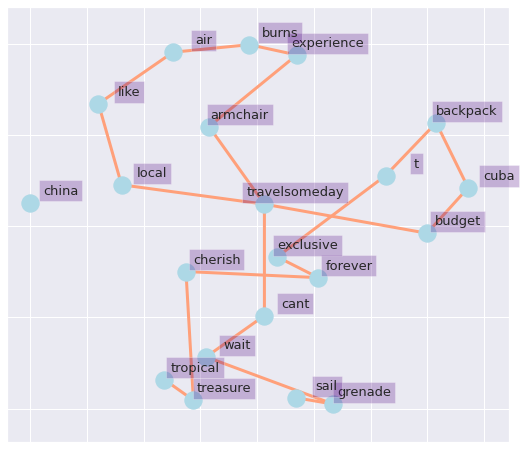

In [18]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(9, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='lightsalmon',
                 node_color='lightblue',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='indigo', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()